In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
#Import dataset
df = pd.read_csv("marketing_campaign.csv", sep=";")
print("Number of datapoints:", len(df))
df.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
#Feature Engineering
#Change Dt_customer datatype to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
#Age of customer 
df["Age"] = 2019-df["Year_Birth"]
#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

#Feature for total members in the householde
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1,inplace=False)

In [4]:
#checking null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   Wines                2240 non-null   int64  
 6   Fruits               2240 non-null   int64  
 7   Meat                 2240 non-null   int64  
 8   Fish                 2240 non-null   int64  
 9   Sweets               2240 non-null   int64  
 10  Gold                 2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

In [5]:
# drop 24 null values in income feature instead replace by mean or median or mod
df=df.dropna()

In [38]:
#checking df again
df.isnull().sum()

Education              0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
Wines                  0
Fruits                 0
Meat                   0
Fish                   0
Sweets                 0
Gold                   0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
Spent                  0
Living_With            0
Children               0
Family_Size            0
Is_Parent              0
dtype: int64

In [11]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,50.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,126.000000,2525.000000,3.000000,5.000000,1.000000


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

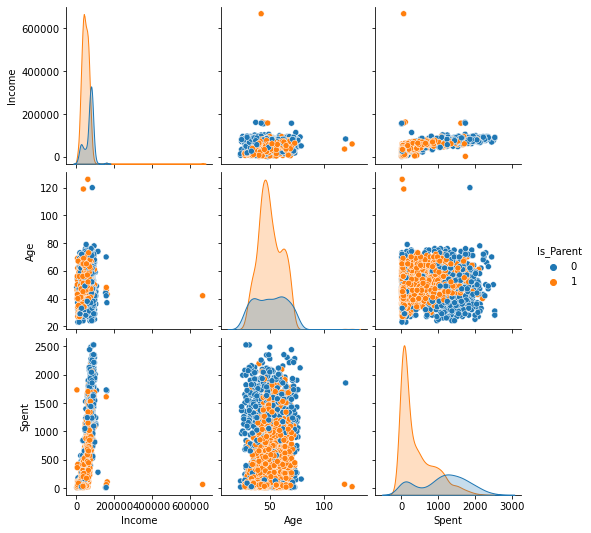

In [14]:
#doubt that this data contain outliers
#plot some selected features 
#Plotting following features
To_Plot = [ "Income", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Is_Parent")
#Taking hue 
plt.show()

In [18]:
#remove oulier
df=df[df['Income']<600000]
df=df[ df['Age']<100]

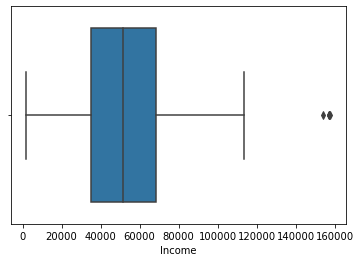

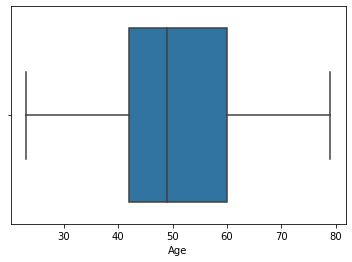

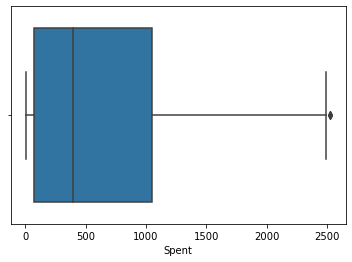

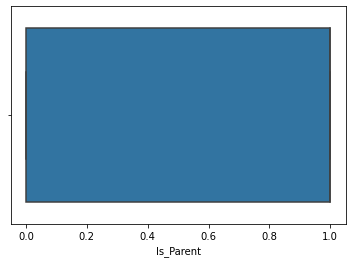

In [23]:
def report(feature):
    sns.boxplot(feature)
    plt.show()
for col in To_Plot:
    report(df[col])

In [39]:
df1=df[['Income','Spent']].iloc[: , :].values
df1

array([[5.8138e+04, 1.6170e+03],
       [4.6344e+04, 2.7000e+01],
       [7.1613e+04, 7.7600e+02],
       ...,
       [5.6981e+04, 1.2410e+03],
       [6.9245e+04, 8.4300e+02],
       [5.2869e+04, 1.7200e+02]])

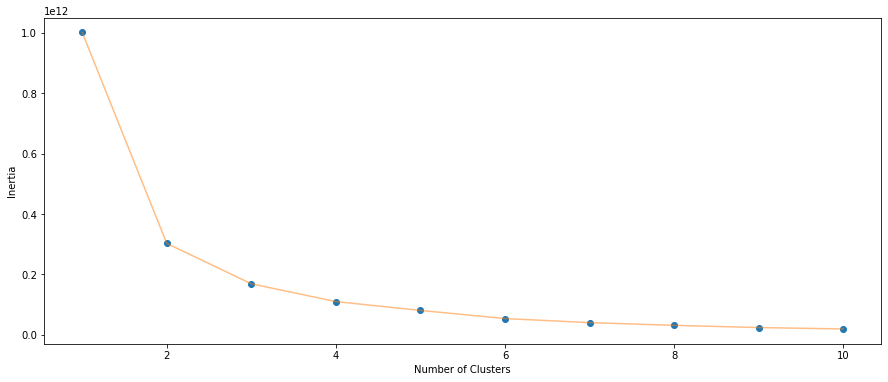

In [40]:
# Using the elkan method to find the optimal number of clusters

from sklearn.cluster import KMeans
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(df1)
    inertia.append(algorithm.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()


In [44]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters =2 , init = 'k-means++', random_state = 50)
y_kmeans = kmeans.fit_predict(df1)

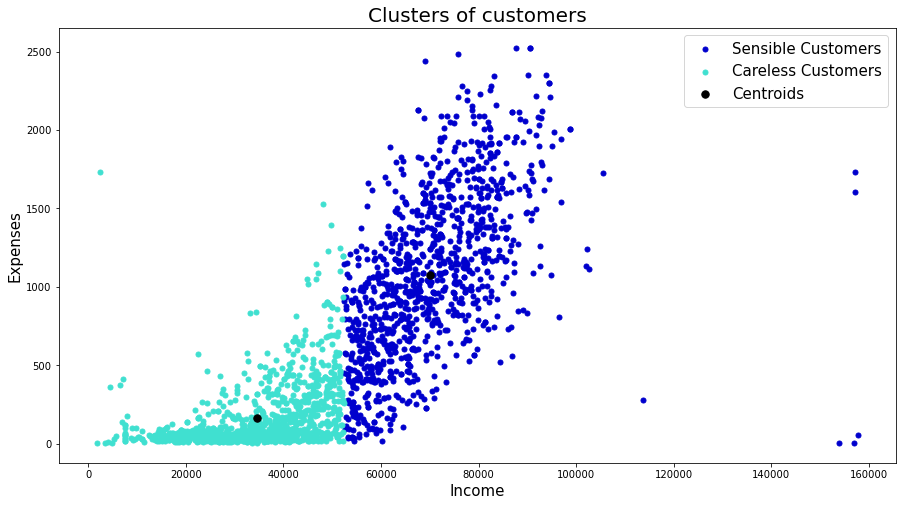

In [45]:
# Visualising the clusters
plt.figure(figsize= (15,8))
plt.scatter(df1[y_kmeans == 0, 0], df1[y_kmeans == 0, 1], s = 25, c = 'mediumblue', label = 'Sensible Customers')
plt.scatter(df1[y_kmeans == 1, 0], df1[y_kmeans == 1, 1], s = 25, c = 'turquoise', label = 'Careless Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 55, c = 'black', label = 'Centroids')
plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Spent',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [ ]:
Because i don't know how to clustering with all (not object)features in python to extract table include cluster column  
so i do that by clutering in Orange - Data Mining app on window to get that result

In [33]:
#read data after clustering into 2 cluster from Orange
df1=pd.read_csv('mar_camp_clus.csv', sep=',')
df1

,Feature 1,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Selected,Cluster,Silhouette
0,0.0,Graduate,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,1,62.0,1617.0,Alone,0.0,1.0,0,No,C2,0.640897
1,1.0,Graduate,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,0,65.0,27.0,Alone,2.0,3.0,1,No,C1,0.630351
2,2.0,Graduate,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,0,54.0,776.0,Partner,0.0,2.0,0,No,C2,0.702566
3,3.0,Graduate,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0,35.0,53.0,Partner,1.0,3.0,1,No,C1,0.700847
4,4.0,Postgraduate,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,0,38.0,422.0,Partner,1.0,3.0,1,No,C2,0.643017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,2235.0,Graduate,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,...,0,52.0,1341.0,Partner,1.0,3.0,1,No,C2,0.671218
2167,2236.0,Postgraduate,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,...,0,73.0,444.0,Partner,3.0,5.0,1,No,C2,0.687281
2168,2237.0,Graduate,56981.0,0.0,0.0,91.0,908.0,48.0,217.0,32.0,...,0,38.0,1241.0,Alone,0.0,1.0,0,No,C2,0.625403
2169,2238.0,Postgraduate,69245.0,0.0,1.0,8.0,428.0,30.0,214.0,80.0,...,0,63.0,843.0,Partner,1.0,3.0,1,No,C2,0.701037


In [34]:
#drop unneeded feature
df1=df1.drop(['Feature 1'],axis=1,inplace=False)
df1


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Selected,Cluster,Silhouette
0,Graduate,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,...,1,62.0,1617.0,Alone,0.0,1.0,0,No,C2,0.640897
1,Graduate,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,...,0,65.0,27.0,Alone,2.0,3.0,1,No,C1,0.630351
2,Graduate,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,...,0,54.0,776.0,Partner,0.0,2.0,0,No,C2,0.702566
3,Graduate,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,...,0,35.0,53.0,Partner,1.0,3.0,1,No,C1,0.700847
4,Postgraduate,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,...,0,38.0,422.0,Partner,1.0,3.0,1,No,C2,0.643017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,Graduate,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,118.0,...,0,52.0,1341.0,Partner,1.0,3.0,1,No,C2,0.671218
2167,Postgraduate,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,0.0,...,0,73.0,444.0,Partner,3.0,5.0,1,No,C2,0.687281
2168,Graduate,56981.0,0.0,0.0,91.0,908.0,48.0,217.0,32.0,12.0,...,0,38.0,1241.0,Alone,0.0,1.0,0,No,C2,0.625403
2169,Postgraduate,69245.0,0.0,1.0,8.0,428.0,30.0,214.0,80.0,30.0,...,0,63.0,843.0,Partner,1.0,3.0,1,No,C2,0.701037


In [ ]:
Starting from here, I re-analyze to clarify the characteristics of the clusters more


In [35]:
#sum Accepted features
df1["Total_Promos"] = df1["AcceptedCmp1"]+ df1["AcceptedCmp2"]+ df1["AcceptedCmp3"]+ df1["AcceptedCmp4"]+ df1["AcceptedCmp5"]

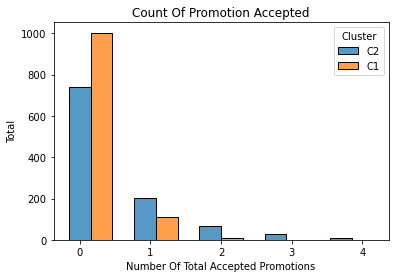

In [36]:
#Plotting count of total campaign accepted.
plt.figure()
sns.histplot(x=df1["Total_Promos"],hue=df1["Cluster"] , multiple="dodge", shrink=2)
plt.title("Count Of Promotion Accepted")
plt.xlabel("Number Of Total Accepted Promotions")
plt.ylabel("Total")
plt.show()


In [91]:
round(df1[mnt_cols].mean(), 1)

Wines     294.7
Fruits     25.0
Meat      152.9
Fish       35.9
Sweets     25.9
Gold       43.4
dtype: float64

In [15]:
mnt_cols = ["Wines","Fruits","Meat","Fish","Sweets","Gold","Cluster"]
temp   = pd.DataFrame(df1, columns = mnt_cols)
temp

,Wines,Fruits,Meat,Fish,Sweets,Gold,Cluster
0,635.0,88.0,546.0,172.0,88.0,88.0,C2
1,11.0,1.0,6.0,2.0,1.0,6.0,C1
2,426.0,49.0,127.0,111.0,21.0,42.0,C2
3,11.0,4.0,20.0,10.0,3.0,5.0,C1
4,173.0,43.0,118.0,46.0,27.0,15.0,C2
...,...,...,...,...,...,...,...
2166,709.0,43.0,182.0,42.0,118.0,247.0,C2
2167,406.0,0.0,30.0,0.0,0.0,8.0,C2
2168,908.0,48.0,217.0,32.0,12.0,24.0,C2
2169,428.0,30.0,214.0,80.0,30.0,61.0,C2


In [16]:
# Total Purchased of Clusters of each Products 
df_gb=temp.groupby(by=["Cluster"])["Wines","Fruits","Meat","Fish","Sweets","Gold",].sum()

print(df_gb)

            Wines   Fruits      Meat     Fish   Sweets     Gold
Cluster                                                        
C1        85433.0   7861.0   38351.0  12410.0   8069.0  25377.0
C2       554263.0  46499.0  293584.0  65484.0  48113.0  68842.0


In [101]:
# Average Purchases by Cluster

df_gb2=df1.groupby(by=["Cluster"])['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases'].mean()

print(df_gb2)

         NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
Cluster                                                            
C1                2.398751         2.725245             0.807315   
C2                2.262857         5.513333             4.442857   

         NumStorePurchases  
Cluster                     
C1                3.615522  
C2                8.081905  


In [104]:
# Total Purchases
purchases_cols = [col for col in df1.columns if 'Purchases' in col]
df1['TotalPurchases'] = df1[purchases_cols].sum(axis=1)

In [118]:
df_gb2=df1.groupby(by=["Cluster"])["TotalPurchases"].sum()
print(df_gb2)

Cluster
C1    10702.0
C2    21316.0
Name: TotalPurchases, dtype: float64


<AxesSubplot:ylabel='NumStorePurchases'>

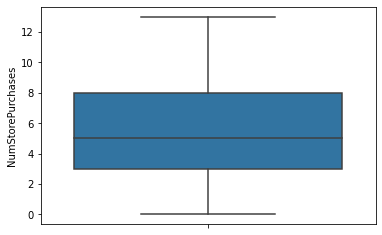

In [125]:
sns.boxplot(data=df1, y="NumStorePurchases", hue="Cluster")

In [127]:
df1['Age'].describe()

count    2171.000000
mean       50.233994
std        11.963638
min        23.000000
25%        42.000000
50%        49.000000
75%        60.000000
max       126.000000
Name: Age, dtype: float64

In [131]:
df01 = df1[(df1.Cluster == 'C2')]

In [132]:
df01['Age'].describe()

count    1050.000000
mean       52.580952
std        12.086581
min        24.000000
25%        44.000000
50%        52.000000
75%        62.000000
max       126.000000
Name: Age, dtype: float64